## Data Science Tutorial - Linear Regression, Random Forest Regressor


•	What are the key features behind purchasing a vehicle?

- Correlations

- Transformation Pipline

- Linear Regression Model 

- Random Forest Regression

- Cross Validation

- Grid Search - Fine tuning hyperparameters


John Ryan 15th May 2017

### Contents

- Load the data to a pandas data frame

- Correlations between variables

- Missing Value Detection

- Encode Labels

- Cross Validation Train/Test Split

- Creating a Linear Regression Model

- Creating a Random Forest Regressor

- Evaluate Model Performance

- Metric 1: RMSE of correct predictions

- Metric 2: K-fold Cross Validation

- Evaluate Model Performance

##  What are the key features behind purchasing a vehicle?



#### Read non - tabular data set to a pandas data frame 

In [1]:
#import the pandas library & define the variable names.
#Here also tell pandas read_table function to seperate the data at every "|" 
#and also assign the variable name to each column. 
import pandas as pd
import numpy as np
var_name = [ 'v1','v2','v3','v4','v5','Price','v7','v8','v9','v10','v11','v12','v13','v14','v15',
            'v16','v17','v18','v19','v20','v21','v22','v23','v24','target']
data  = pd.read_table('C:\\data\\SampleData.txt', sep = '|', header = None, names=var_name)


In [2]:
data.head(5)

,v1,v2,v3,v4,v5,Price,v7,v8,v9,v10,...,v16,v17,v18,v19,v20,v21,v22,v23,v24,target
0,102120401529162609,1001396153,2017-01-02 12:04:01,2,1,750.26,2,1,1,5,...,8.0,385,3,1,1,2,14.0,2017-02-04 00:00:00,71,0
1,102120401529162609,401793302,2017-01-02 12:04:01,2,1,322.12,4,1,1,5,...,6.0,1368,3,0,1,2,14.0,2017-02-04 00:00:00,71,0
2,102120401529162609,2100312948,2017-01-02 12:04:01,1,1,466.38,1,1,2,5,...,7.0,1741,3,0,1,2,14.0,2017-02-04 00:00:00,71,0
3,102120401529162609,1697088827,2017-01-02 12:04:01,1,1,303.52,4,1,2,5,...,6.0,1912,3,0,1,2,14.0,2017-02-04 00:00:00,71,0
4,102120401529162609,682137395,2017-01-02 12:04:01,1,1,282.19,1,1,1,3,...,6.0,1960,3,0,1,2,14.0,2017-02-04 00:00:00,71,0


In [3]:
data.describe()

,v1,v2,v4,v5,Price,v7,v8,v9,v10,v11,...,v15,v16,v17,v18,v19,v20,v21,v22,v24,target
count,1.108765e+06,1.108765e+06,1.108765e+06,1.108765e+06,1.108765e+06,1.108765e+06,1.108765e+06,1.108765e+06,1.108765e+06,1.108765e+06,...,1.108765e+06,1.095568e+06,1.108765e+06,1.108765e+06,1.108765e+06,1.108765e+06,1.108765e+06,1.108765e+06,1.108765e+06,1.108765e+06
mean,2.881691e+16,1.072195e+09,1.265895e+00,9.341276e-01,6.278993e+02,2.542878e+00,2.574618e+00,1.305501e+00,4.531986e+00,2.841257e+00,...,4.596040e+00,6.827730e+00,1.651687e+03,3.537109e+00,2.225611e-01,2.446152e+00,1.624372e+00,9.322821e+00,9.803950e+02,3.659928e-03
std,4.649240e+16,6.231840e+08,4.993720e-01,2.480590e-01,6.351999e+02,2.435445e+00,2.869880e+00,7.680090e-01,8.189798e-01,1.432739e+00,...,3.136224e+00,8.699843e-01,9.968389e+02,2.447612e+00,4.159661e-01,3.541486e+00,4.842848e-01,5.445166e+00,1.172454e+03,6.038656e-02
min,3.114840e+14,3.918000e+03,1.000000e+00,0.000000e+00,1.591800e+02,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,...,1.000000e+00,4.000000e+00,4.700000e+01,2.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,7.100000e+01,0.000000e+00
25%,5.214847e+14,5.275361e+08,1.000000e+00,1.000000e+00,2.942000e+02,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00,2.000000e+00,...,2.000000e+00,6.000000e+00,4.790000e+02,3.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,6.000000e+00,7.100000e+01,0.000000e+00
50%,8.114858e+14,1.072732e+09,1.000000e+00,1.000000e+00,4.364200e+02,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,3.000000e+00,...,4.000000e+00,7.000000e+00,1.912000e+03,3.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,7.000000e+00,7.100000e+01,0.000000e+00
75%,1.021232e+17,1.619128e+09,1.000000e+00,1.000000e+00,7.245900e+02,4.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,4.000000e+00,...,7.000000e+00,8.000000e+00,2.375000e+03,3.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,1.300000e+01,2.492000e+03,0.000000e+00
max,1.091055e+17,2.147477e+09,3.000000e+00,1.000000e+00,3.687822e+04,1.100000e+01,9.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00,...,1.600000e+01,8.000000e+00,6.021000e+03,1.700000e+01,1.000000e+00,4.600000e+01,2.000000e+00,7.000000e+01,2.492000e+03,1.000000e+00


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
#data.hist(bins=50, figsize=(20,15))
#plt.show()

### Distribution of the Price Variable

Looking at the distribution below we see a clear right skewed despersion.It looks like from the horizontal axis on the histogram that over 900,000 vechicle prices are between the value of 0 - 1000. This distribution is not ideal for regression but will be usfeul when fitting the regression model. 

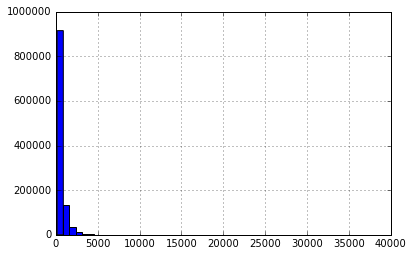

In [5]:
#Limit Balance Histogram
data['Price'].hist(bins = 50)
plt.show()

#### 2.1 Logging Price to Improve distribution

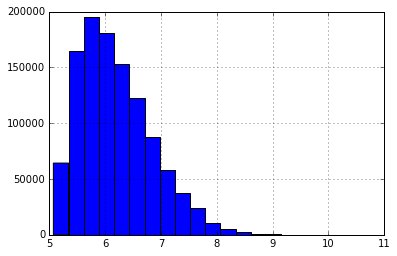

In [6]:
#import numpy library for the computation of np.log and create resulting histogram
import numpy as np
data['price_log'] = np.log(data['Price'])
data['price_log'].hist(bins=20)

### 3. Looking for Correlations and meaure of ‘association’

Finding the relationship between two quantitative variables without being able to infer causal relationships, it is simply a number indicating how a number of relationships between variables closely follows a straight line. Correlation is a statistical technique used to determine the degree to which two variables are related.

Before we carry out a simple linear regression between a number of variables we need to see if they are related.

Correlation coefficient is also known as Pearson Product-Moment Correlation Coefficient (r). 

While in regression the emphasis is on predicting one variable from the other, in correlation the emphasis is on the degree to which a linear model may describe the relationship between variables.

The value of r ranges between ( -1) and ( +1) The value of r denotes the strength of the association we can see from the correlation matrix below that the duration v22,v15,v19 and v14 have the highest correlations. How ever we see that v22(Rental Duration)has the highest positive relationship with a value of 0.423 which is not overly strong a value over 0.75 however would offer more confidence.

When interpreting the scatterplot it was important to look for trends in the data as you go from left to right:

The data shows a central uphill pattern as you move from left to right, which indicates some positive relationship between v22(Rental Duration) and v6 (price of the car).In theory as each of the X values (v22,v15,v19,v14)increase i.e (moves right), so to will the price increase (moves upwards).

##### Scatter Plot 1 - Price(v6) vs Feature(v22)

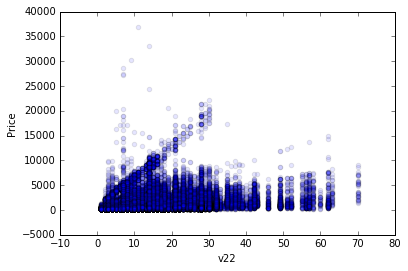

In [7]:
#Plot Price vs Feature(v22)
data.plot(kind='scatter', x='v22', y='Price', alpha = 0.1)        

##### Scatter Plot 2 - Price(v6) vs Feature(v22) group by Purchase

From the simple plot below we can clearly see that as the rental duration increases the number of booking decline. However we see a higher cluster of bookings between short rental durations of 10 & 20 but a sudden sharp increase in prices between 20 & 30 leading to a period of decline in purchases.It may be appropriate to suggest that by decreasing or normalising the car rental price to between 10,000 and 15,000 for the rental periods between 20 & 30 may lead to an increased volume of bookings.

1 = Car booking 

0= No car booking

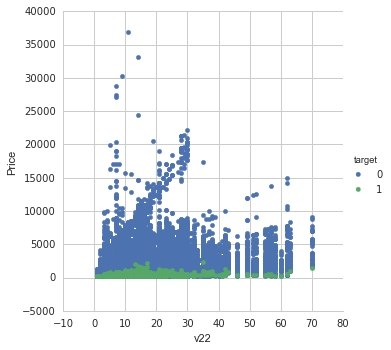

In [8]:
import seaborn as sns
sns.set_style('whitegrid')
sns.FacetGrid(data, hue="target", size=5) \
   .map(plt.scatter, "v22", "Price") \
   .add_legend();

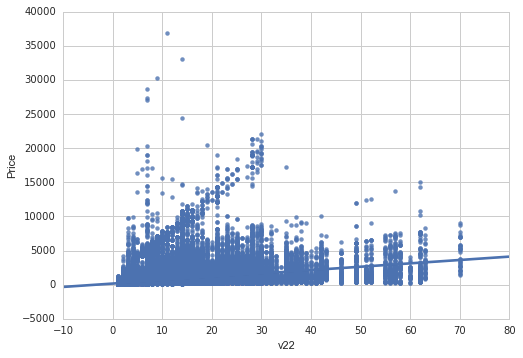

In [9]:
sns.regplot(x= "v22", y="Price", data=data)

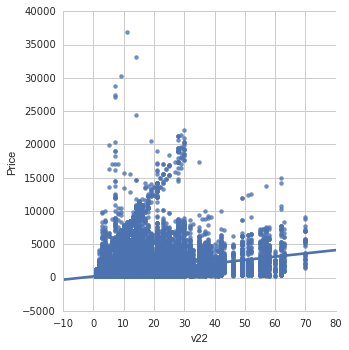

In [10]:
sns.lmplot(x= "v22", y="Price",  data=data)

### Visualizing the correlation matrix 

Computing correlation


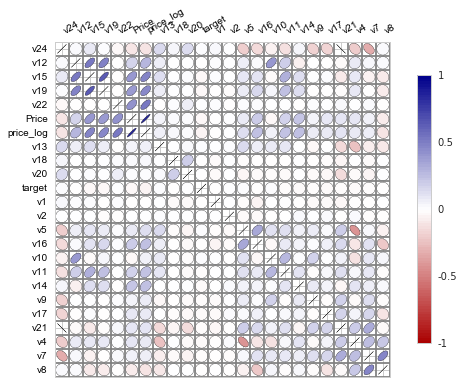

In [11]:
#Plot a correlation matrix 
from biokit.viz import corrplot
c = corrplot.Corrplot(data)
c.plot()

In [12]:
corr_matrix = data.corr()

In [13]:
corr_matrix["Price"].sort_values(ascending=False)

Price        1.000000
price_log    0.841488
v22          0.423331
v15          0.398544
v19          0.390827
v14          0.221968
v16          0.195748
v11          0.176109
v12          0.169756
v21          0.100535
v4           0.093966
v17          0.086594
v5           0.085926
v7           0.050325
v13          0.041645
v9           0.040714
v18          0.018612
v20          0.013213
v2           0.003210
v1          -0.002696
v10         -0.027845
target      -0.028054
v8          -0.075665
v24         -0.100535
Name: Price, dtype: float64

### We select the top most correlated features and input to Regression Model

In [14]:
#create a new dataframe with highly correlated features
x = pd.DataFrame(data, columns = ['Price','v22','v15','v19','v14','v16','v12'])
x.tail(4)

,Price,v22,v15,v19,v14,v16,v12
1108761,643.88,4.0,8,0,0,7.0,7
1108762,201.83,4.0,2,0,0,6.0,5
1108763,465.06,4.0,7,0,1,8.0,5
1108764,318.97,4.0,8,0,0,7.0,7


### 4. Missing Value Detection

In [15]:
#check for missing values in the dataframe
x.apply(lambda x: sum(x.isnull()),axis=0)

Price        0
v22          0
v15          0
v19          0
v14          0
v16      13197
v12          0
dtype: int64

In [16]:
#Missing Value imputation using median value;
x = x.fillna(x.median())
x.head(7)

,Price,v22,v15,v19,v14,v16,v12
0,750.26,14.0,8,1,0,8.0,7
1,322.12,14.0,4,0,0,6.0,5
2,466.38,14.0,4,0,0,7.0,5
3,303.52,14.0,4,0,0,6.0,5
4,282.19,14.0,2,0,0,6.0,4
5,318.60,14.0,1,0,0,7.0,4
6,334.61,14.0,2,0,0,8.0,5


### 5. One Hot Label Encoder

In [17]:
#Label encoder
from sklearn.preprocessing import LabelEncoder

for feature in x.columns:
    if x[feature].dtype=='object':
        le = LabelEncoder()
        x[feature] = le.fit_transform(x[feature])
x.tail(5)

,Price,v22,v15,v19,v14,v16,v12
1108760,633.72,4.0,7,0,0,8.0,5
1108761,643.88,4.0,8,0,0,7.0,7
1108762,201.83,4.0,2,0,0,6.0,5
1108763,465.06,4.0,7,0,1,8.0,5
1108764,318.97,4.0,8,0,0,7.0,7


### 6. Feature Scaling - Normalization with Standard Scaling

In [18]:
from sklearn import preprocessing
#scale the data 
from sklearn.preprocessing import StandardScaler
scaler = preprocessing.StandardScaler().fit(x)
X = scaler.transform(x)
Y = x.Price.values
print (X)

[[ 0.19263346  0.85896011  1.0853695  ..., -0.4569599   1.35286693
   1.59963548]
 [-0.48139084  0.85896011 -0.19005021 ..., -0.4569599  -0.95929131
  -0.19347275]
 [-0.25428115  0.85896011 -0.19005021 ..., -0.4569599   0.19678781
  -0.19347275]
 ..., 
 [-0.67076438 -0.97753187 -0.82776006 ..., -0.4569599  -0.95929131
  -0.19347275]
 [-0.25635923 -0.97753187  0.76651457 ...,  2.18837581  1.35286693
  -0.19347275]
 [-0.48634992 -0.97753187  1.0853695  ..., -0.4569599   0.19678781
   1.59963548]]


### 7. Train - Test Split

Split the data set into 70% train and hold 30% as a test set.

In [19]:
#Cross - Validation 
from sklearn import cross_validation
x_train, x_test, y_train, y_test = cross_validation.train_test_split(X, Y, test_size=0.3, random_state=0)

C:\Users\IBM_ADMIN\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### 8. Train & Select Machine Learning Model
#### 8.1 Create Linear Regression Model

In [20]:
from sklearn.linear_model import LinearRegression
regmodel = LinearRegression(n_jobs=4)
regmodel

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=4, normalize=False)

#### 8.2 Make Predictions: Fit Model to Test data

In [21]:
regmodel.fit(x_train,y_train)
predict = regmodel.predict(x_test)

In [22]:
regmodel.intercept_

627.8992948731244

In [23]:
regmodel.coef_

array([  6.35199647e+02,   5.86543724e-14,   5.44063786e-14,
         2.30497197e-13,   6.25891533e-14,   2.79931164e-14,
         7.65826906e-14])

#### 8.3 Linear Regression Model Acccuracy - RMSE

In [24]:
from sklearn.metrics import mean_squared_error
price_predict = regmodel.predict(x_train)
regmodel_mse = mean_squared_error(y_train, price_predict)
reg_model_rmse = np.sqrt(regmodel_mse)
reg_model_rmse

7.9844345036499249e-13

### Analysis & Results of the Multiple Linear Regression Model

This section of the report analyzes a multiple linear regression model between the Y and the independent variables v22,v15,v19,v14,v16,v11,v12,v21.

**Interpretation of the slope** The Interpretation of slope coefficients in this model shows that the value of 6.35199647e+02 for v22 means that price does not increase for each rise of one unit increase in duration. The small value of 4.25570655e-14 for v15 means that price will increase by 4.25570655e-14 units for each rise of one unit in v15. This helps to assess the statistical significance of the estimated causal linkages and determine how little impact these continous variables have on the price.



### Random Forest Regressor Model

In [25]:
from sklearn.ensemble import RandomForestRegressor
ranmodel = RandomForestRegressor(n_estimators=30, min_samples_split=28, max_depth=10, max_features='auto')
ranmodel.fit(x_train,y_train)
print("Predictions:", ranmodel.predict(x_test))

('Predictions:', array([ 621.31179357,  980.91050654,  614.04846008, ...,  307.17366619,
        306.18494624,  170.63928642]))


### Random Forest Regressor - Model Accuracy - RMSE

In [26]:
ran_price_predict = ranmodel.predict(x_train)
ranmodel_mse = mean_squared_error(y_train, ran_price_predict)
ran_model_rmse = np.sqrt(ranmodel_mse)
ran_model_rmse

12.589243609869573